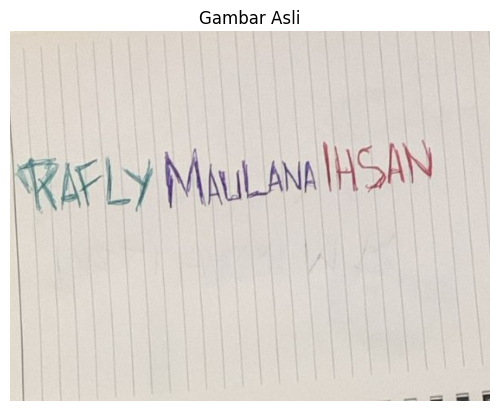

Nilai ambang batas dari terkecil ke terbesar:
Green: 168.0
Blue: 168.0
Red: 177.0


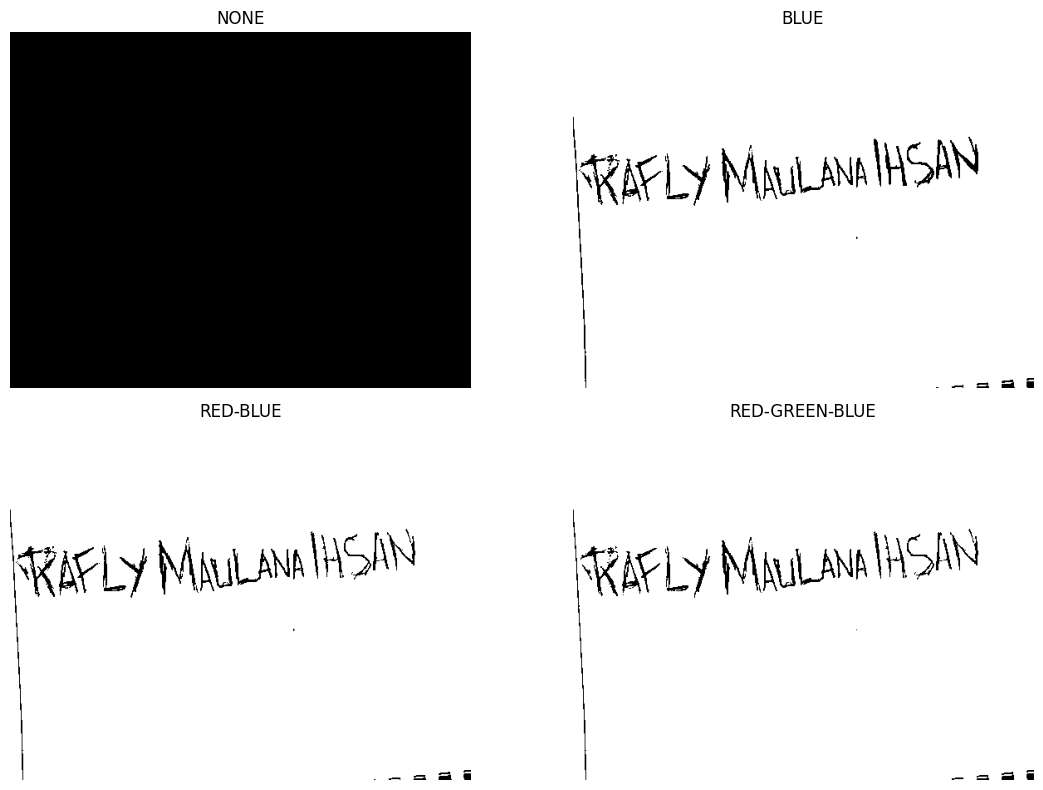

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread("NAMA.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Gambar Asli")
plt.axis("off")
plt.show()

blue, green, red = cv2.split(img)

def get_otsu_threshold(channel):
    thresh_val, _ = cv2.threshold(channel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresh_val

t_red = get_otsu_threshold(red)
t_green = get_otsu_threshold(green)
t_blue = get_otsu_threshold(blue)

thresholds = {
    'Red': t_red,
    'Green': t_green,
    'Blue': t_blue
}

# Urutkan threshold dari kecil ke besar
sorted_thresholds = dict(sorted(thresholds.items(), key=lambda x: x[1]))
print("Nilai ambang batas dari terkecil ke terbesar:")
for k, v in sorted_thresholds.items():
    print(f"{k}: {v}")

def apply_thresholds(r, g, b, t_r=0, t_g=0, t_b=0):
    mask = np.zeros_like(r)
    if t_r: mask |= (r > t_r)
    if t_g: mask |= (g > t_g)
    if t_b: mask |= (b > t_b)
    return mask.astype(np.uint8) * 255

combinations = {
    "NONE": apply_thresholds(red, green, blue),
    "BLUE": apply_thresholds(red, green, blue, t_b=t_blue),
    "RED-BLUE": apply_thresholds(red, green, blue, t_r=t_red, t_b=t_blue),
    "RED-GREEN-BLUE": apply_thresholds(red, green, blue, t_r=t_red, t_g=t_green, t_b=t_blue)
}

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for ax, (title, mask) in zip(axs.ravel(), combinations.items()):
    ax.imshow(mask, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()
